In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [22]:
df = pd.read_csv(
            Path("../data/dailyclimate.csv.gz"),
            compression="gzip",
            dayfirst=True
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          883128 non-null  int64  
 1   Date                883128 non-null  object 
 2   District            883128 non-null  object 
 3   Latitude            883128 non-null  float64
 4   Longitude           883128 non-null  float64
 5   Precip              883128 non-null  float64
 6   Pressure            883128 non-null  float64
 7   Humidity_2m         883128 non-null  float64
 8   RH_2m               883128 non-null  float64
 9   Temp_2m             883128 non-null  float64
 10  WetBulbTemp_2m      883128 non-null  float64
 11  MaxTemp_2m          883128 non-null  float64
 12  MinTemp_2m          883128 non-null  float64
 13  TempRange_2m        883128 non-null  float64
 14  EarthSkinTemp       883128 non-null  float64
 15  WindSpeed_10m       883128 non-nul

In [8]:
df.isnull().sum()

Unnamed: 0            0
Date                  0
District              0
Latitude              0
Longitude             0
Precip                0
Pressure              0
Humidity_2m           0
RH_2m                 0
Temp_2m               0
WetBulbTemp_2m        0
MaxTemp_2m            0
MinTemp_2m            0
TempRange_2m          0
EarthSkinTemp         0
WindSpeed_10m         0
MaxWindSpeed_10m      0
MinWindSpeed_10m      0
WindSpeedRange_10m    0
WindSpeed_50m         0
MaxWindSpeed_50m      0
MinWindSpeed_50m      0
WindSpeedRange_50m    0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,MaxTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
count,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,...,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000
mean,441563.500000,27.959677,84.277419,2.433753,82.896390,8.491043,55.657950,15.815832,5.428265,21.856533,...,10.795352,15.539531,2.372512,4.673551,0.666903,4.006641,2.730587,4.643453,0.924084,3.719365
std,254937.238602,0.883261,2.181331,6.160721,10.707984,5.426636,22.877576,9.172463,10.850204,8.848121,...,3.306661,9.924091,0.685488,1.355903,0.510857,1.300380,1.001095,1.509792,0.806458,1.282227
min,0.000000,26.500000,80.200000,0.000000,54.730000,0.270000,4.040000,-25.440000,-28.190000,-16.940000,...,1.310000,-33.160000,0.470000,0.970000,0.000000,0.450000,0.650000,1.120000,0.000000,0.450000
25%,220781.750000,27.300000,82.400000,0.000000,77.680000,3.910000,36.540000,10.070000,-2.740000,16.550000,...,8.250000,9.160000,1.900000,3.730000,0.310000,3.070000,2.070000,3.610000,0.400000,2.830000
50%,441563.500000,27.950000,84.300000,0.050000,83.720000,6.750000,54.320000,16.730000,4.980000,22.510000,...,10.920000,16.530000,2.260000,4.520000,0.530000,3.910000,2.510000,4.340000,0.680000,3.520000
75%,662345.250000,28.500000,85.900000,1.870000,92.740000,13.170000,77.160000,22.500000,14.780000,27.940000,...,13.210000,22.880000,2.710000,5.450000,0.870000,4.840000,3.100000,5.310000,1.170000,4.390000
max,883127.000000,30.000000,87.900000,177.790000,100.340000,23.270000,100.000000,38.610000,27.150000,46.820000,...,25.520000,41.510000,13.570000,20.210000,8.360000,16.580000,15.710000,22.850000,10.940000,18.500000


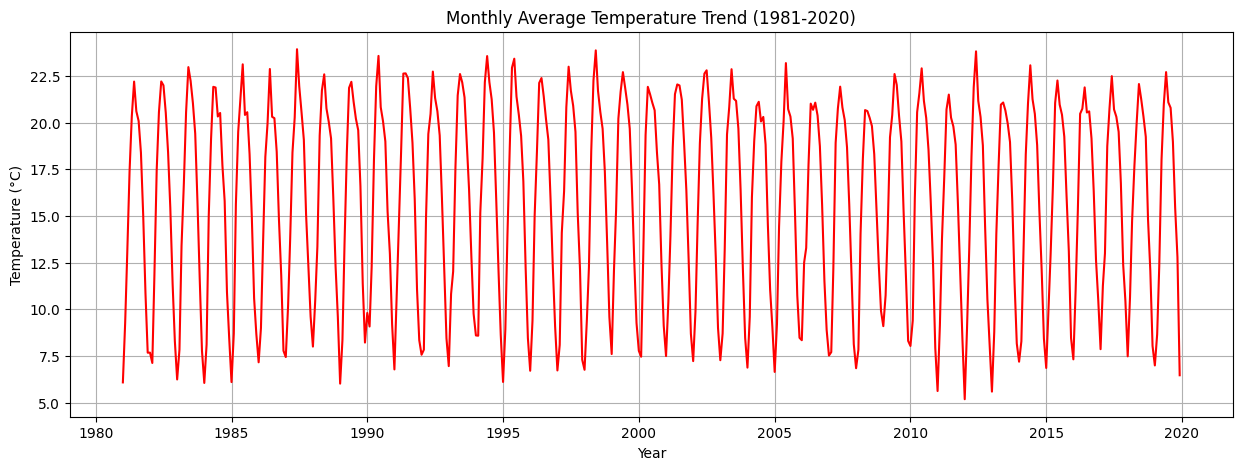

In [219]:
df['Date'] = pd.to_datetime(df['Date'])  #  convert to datetime first

# separate month as period
df['Month'] = df['Date'].dt.to_period('M')

monthly_temp = df.groupby('Month')['Temp_2m'].mean()
monthly_temp.index = monthly_temp.index.to_timestamp()
plt.figure(figsize=(15,5))
plt.plot(monthly_temp.index, monthly_temp.values, color='red')
plt.title('Monthly Average Temperature Trend (1981-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


<Axes: >

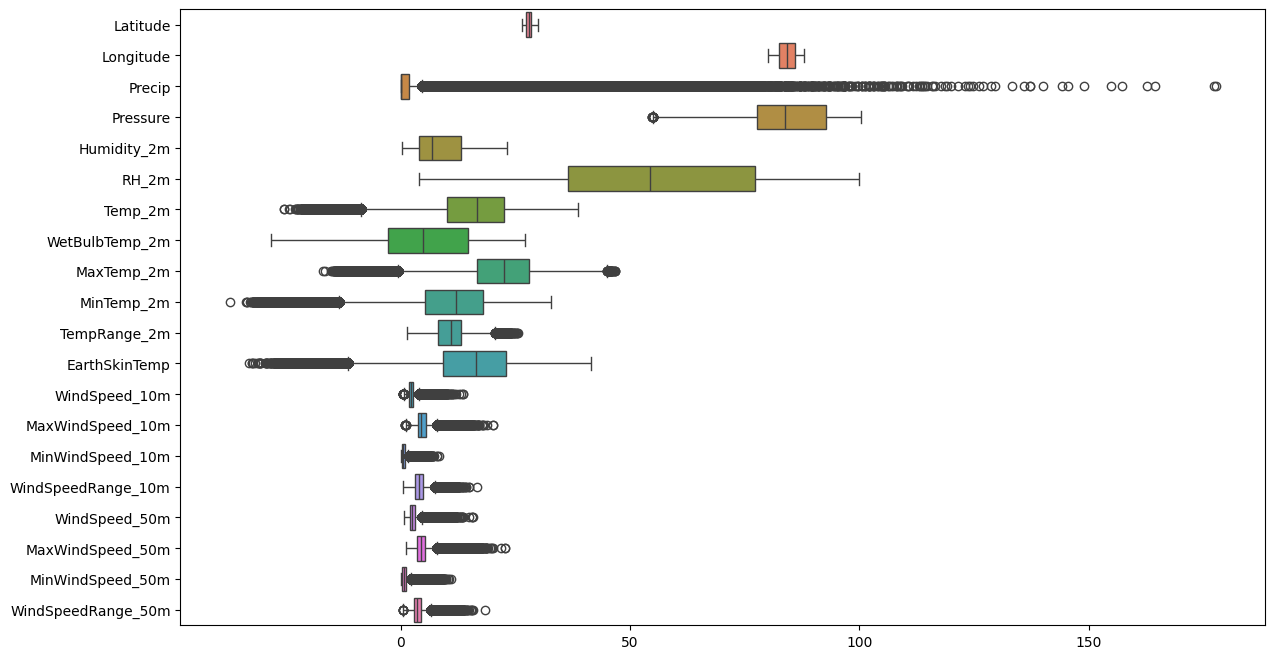

In [201]:
df1=df.drop('Unnamed: 0',axis=1)
df1=df1.drop(['Date','District','Month'],axis=1)
plt.subplots(figsize=(14,8))
sns.boxplot(df1,label=True,orient='h')

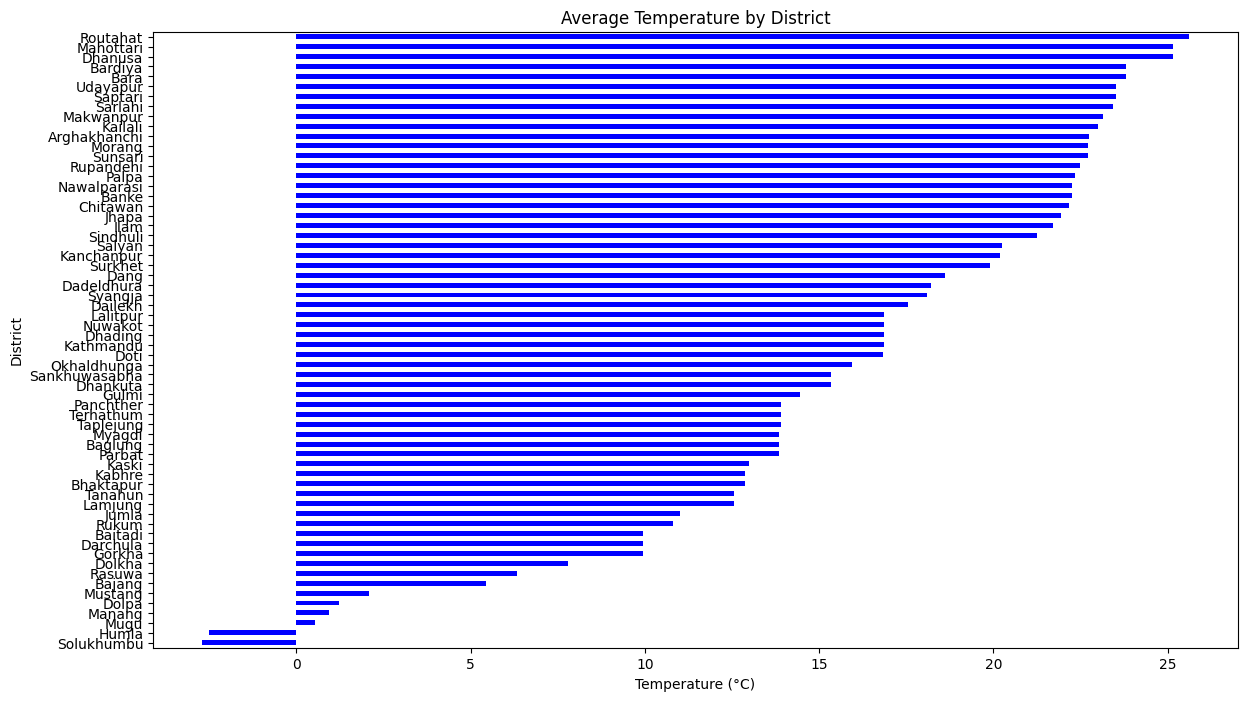

In [217]:
# District-Wise Average Temperature
district_avg_temp = df.groupby('District')['Temp_2m'].mean().sort_values()

plt.figure(figsize=(14,8))
district_avg_temp.plot(kind='barh', color='blue')
plt.title('Average Temperature by District')
plt.xlabel('Temperature (°C)')
plt.show()

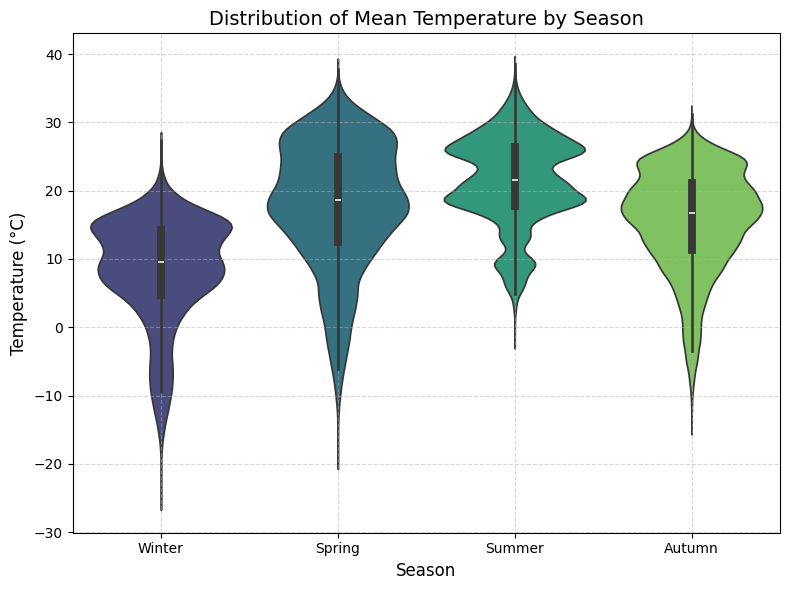

In [ ]:


# Parse date and extract month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['MONTH'] = df['Date'].dt.month

#Assign season if not already present
def assign_season(month):
    if pd.isna(month):
        return None
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    return 'Unknown'

df['Season'] = df['MONTH'].apply(assign_season)

#Filter clean rows for plotting
df = df.dropna(subset=['Season', 'Temp_2m'])

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x='Season',
    y='Temp_2m',
    hue='Season',           # Color by season
    palette='viridis',
    dodge=False,            # Overlay not split
    legend=False            # Hue = x, no extra legend needed
)

plt.title('Mean Temperature Season-wise', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()